In [1]:
from vizman import viz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

default_things: str = "../Pyvizman/vizman/"
default_colors: dict = viz.load_data_from_json(default_things + "colors.json")

viz.set_visual_style(
    json_color_path=default_things + "colors.json", change_colors=False
)

reciprocity_colors = sns.blend_palette(
    [default_colors["purples"]["REDISH_PURPLE"],
     default_colors["warms"]["YELLOW"]],n_colors=11
)


In [2]:
binar_path: str = "datasets/binary/MC_binary.npy"
weighted_path: str = "datasets/weighted/MC_weighted.npy"

In [3]:
binary_dataset: np.ndarray = np.load(binar_path)
weighted_dataset: np.ndarray = np.load(weighted_path)

In [19]:
# Convert numpy arrays to pandas DataFrames
binary_df = pd.DataFrame(binary_dataset, columns=[f"{i/10}" for i in range(binary_dataset.shape[1])])
weighted_df = pd.DataFrame(weighted_dataset, columns=[f"{(i)/10}" for i in range(weighted_dataset.shape[1])])

# Add a column to indicate the type of dataset
binary_df['Type'] = 'Binary'
weighted_df['Type'] = 'Weighted'

# Concatenate the two DataFrames
combined_df = pd.concat([binary_df, weighted_df], ignore_index=True)

# Convert to long form
long_form_df = pd.melt(combined_df, id_vars=['Type'], var_name='Reciprocity', value_name='memory capacity')

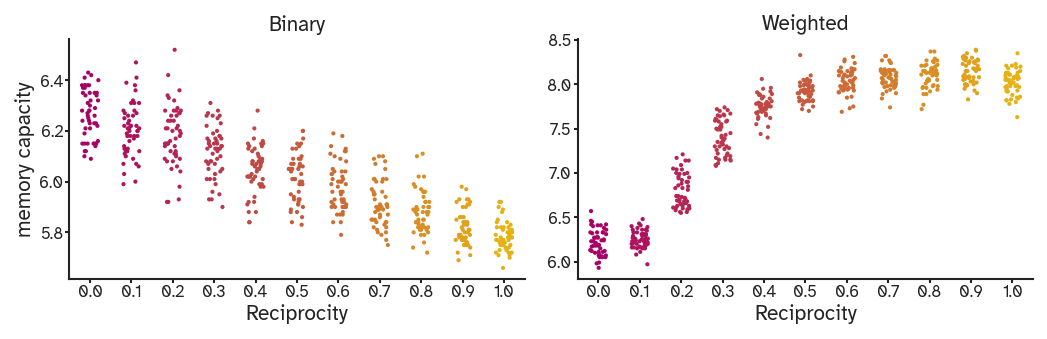

In [25]:
fig, axes = plt.subplot_mosaic("""AB""",
                               figsize=viz.cm_to_inch([18,6]),
                               dpi=150)
# Plot the Binary data
sns.stripplot(data=long_form_df[long_form_df['Type'] == 'Binary'],
              x='Reciprocity',
              y='memory capacity',
              hue='Reciprocity',
              palette=reciprocity_colors,
              ax=axes['A'],
              jitter=0.2,
              rasterized=True,
              s=2
              )

# Plot the Weighted data
sns.stripplot(data=long_form_df[long_form_df['Type'] == 'Weighted'],
              x='Reciprocity',
              y='memory capacity',
              hue='Reciprocity',
              palette=reciprocity_colors,
              ax=axes['B'],
              jitter=0.2,
              rasterized=True,
              s=2
              )

axes['A'].set_title("Binary")
axes['B'].set_title("Weighted")
axes['B'].set_ylabel("")
sns.despine(fig=fig)
fig.tight_layout()
plt.savefig("figures/MC.pdf",bbox_inches='tight',transparent=True, dpi=600)